In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pickle
import os
import json
from random import sample
from scipy.ndimage import zoom
#from soma import aims
#import dico_toolbox as dtb
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

In [7]:
# check average age of each group

# Release3 dHCP : select subjects from info dataframe

dir_Release3 = '/neurospin/grip/external_databases/dHCP_CR_JD_2018/Projects/denis/release3_scripts/subjects_file_v4.json'
with open(dir_Release3) as f:
    subjects_R3 = json.load(f)

subjects_R3 = list(subjects_R3.keys())

# get the session ids of R3
dir_sessions = '/neurospin/grip/external_databases/dHCP_CR_JD_2018/Projects/denis/release3_scripts/subjects_file_v4.json'
with open(dir_sessions) as f:
    dict_sessions = json.load(f)
sessions = [value['session_id'] for _, value in dict_sessions.items()]

# get dHCP info
dir_info_dHCP = '/home/jl274628/Documents/info_dHCP.tsv'
info_dHCP = pd.read_csv(dir_info_dHCP, usecols=['participant_id', 'birth_age', 'scan_age', 'session_id'], sep='\t')
# filter over subjects
info_dHCP.drop(info_dHCP[~(info_dHCP['participant_id'].isin(subjects_R3))].index, inplace = True)
#info_dHCP.drop(info_dHCP[(info_dHCP['scan_number']!=1)].index, inplace = True) # not always scan 1
# filter over sessions
info_dHCP.drop(info_dHCP[~(info_dHCP['session_id'].isin(sessions))].index, inplace = True)
info_dHCP.reset_index(drop=True, inplace=True)

NB: the linear classification was performed between extremely preterms and full terms ONLY.

In [21]:
# first compute correlations with supervised classification

model = "chosen_model_crop_baby_STS_trained_on_UkBioBank_supervised_dHCP_linear_classification_28wks/fold"
preds = []
for k in [1,2]:
    predictions = pd.read_csv(f'/neurospin/dico/jlaval/Runs/01_deep_supervised/Program/Output/{model}{k}/STs_dHCP_374_supervised_results/train_predictions.csv')
    preds.append(predictions)

preds = pd.concat(preds, axis=0)
preds.columns=['participant_id', 'label', 'predicted label']

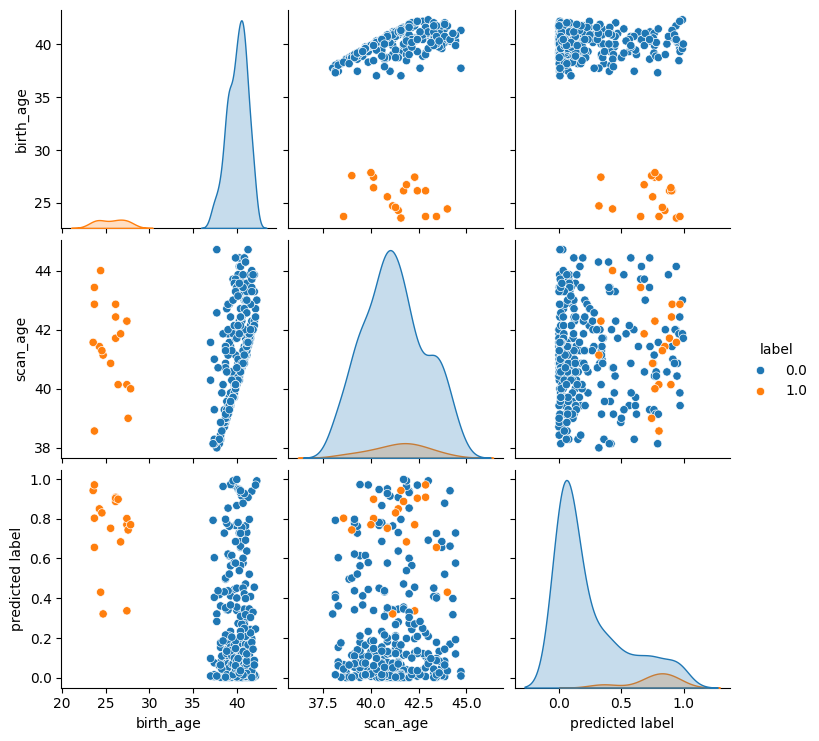

In [23]:
df = pd.merge(info_dHCP, preds, on='participant_id')
sns.pairplot(df[['birth_age', 'scan_age', 'label', 'predicted label']], hue='label')

In [35]:
# correlation between predicted label and scan_age
#in full-terms / preterms
for i, cat in enumerate(['full-terms', 'preterms']):
    R = pearsonr(df['scan_age'].loc[df['label']==i].tolist(), df['predicted label'].loc[df['label']==i].tolist())
    print(f'{cat}: {R}')


full-terms: PearsonRResult(statistic=0.01036278968498935, pvalue=0.8636766224267514)
preterms: PearsonRResult(statistic=-0.1855108913354534, pvalue=0.44703738362285095)


In [ ]:
# second see where the scan age lands in UMAP ?